In [1]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

In [2]:
import yfinance as yf
nasdaq=yf.download("^IXIC", start='2003-11-17')
data=nasdaq
import pandas as pd
data
df = data
df['Rate'] = 0
for i in range(len(df)):
    if i == 5035:
        break
    df['Rate'][i] = ((df['Close'][i+1] - df['Close'][i])/df['Close'][i])*100

[*********************100%%**********************]  1 of 1 completed


<ipython-input-2-3610e310940b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate'][i] = ((df['Close'][i+1] - df['Close'][i])/df['Close'][i])*100


In [3]:
df[["Rate"]].max(),df[["Rate"]].min(),df[["Rate"]].mean(), df[["Rate"]].quantile(.75)

(Rate    11.80593
 dtype: float64,
 Rate   -12.321331
 dtype: float64,
 Rate    0.048737
 dtype: float64,
 Rate    0.714009
 Name: 0.75, dtype: float64)

In [4]:
df[["Rate"]].quantile(.50),df[["Rate"]].quantile(.25)

(Rate    0.090708
 Name: 0.5, dtype: float64,
 Rate   -0.534717
 Name: 0.25, dtype: float64)

In [5]:
for i in range(len(df['Rate'])):
    if df['Rate'][i] > 0.7:
        df['Rate'][i] = 2
    elif df['Rate'][i] < -0.5:
        df['Rate'][i] = 0
    else:
        df['Rate'][i] = 1
Rate_data = df

<ipython-input-5-8acbc47f5c31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate'][i] = 0
<ipython-input-5-8acbc47f5c31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate'][i] = 2
<ipython-input-5-8acbc47f5c31>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate'][i] = 1


In [6]:
gold_data = yf.download('GC=F', start='2003-11-17')
usd_data = yf.download('USDKRW=X', start='2003-11-17')
bond_data = yf.download('^IRX', start='2003-11-17')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
len(gold_data),len(usd_data),len(bond_data),len(Rate_data)

(5051, 5207, 5055, 5061)

In [8]:
gold_data = gold_data.rename(columns = {'Open':'gold_Open', 'High':'gold_high', 'Low':'gold_Low', 'Close':'gold_Close'})
usd_data = usd_data.rename(columns = {'Open':'usd_Open', 'High':'usd_high', 'Low':'usd_Low', 'Close':'usd_Close'})
bond_data = bond_data.rename(columns = {'Open':'bond_Open', 'High':'bond_high', 'Low':'bond_Low', 'Close':'bond_Close'})

In [9]:
import numpy as np
gold_data = np.log(gold_data).diff(1)
usd_data = np.log(usd_data).diff(1)
bond_data = np.log(bond_data).diff(1)
gold_data = gold_data.iloc[:, :4]
usd_data = usd_data.iloc[:, :4]
bond_data = bond_data.iloc[: ,:4]

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [10]:
first = pd.concat([gold_data,usd_data],axis=1)
second=pd.concat([first,bond_data],axis=1)
second

,gold_Open,gold_high,gold_Low,gold_Close,usd_Open,usd_high,usd_Low,usd_Close,bond_Open,bond_high,bond_Low,bond_Close
Date,,,,,,,,,,,,
2003-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-11-18,0.000000,-0.001006,-0.001006,0.015461,NaN,NaN,NaN,NaN,0.010776,0.006417,0.004324,0.008584
2003-11-19,0.000251,0.000251,0.000251,-0.006814,NaN,NaN,NaN,NaN,-0.001072,-0.006417,0.000000,-0.009662
2003-11-20,-0.010109,-0.010109,-0.010109,-0.003043,NaN,NaN,NaN,NaN,-0.005379,-0.005379,-0.007580,-0.005408
2003-11-21,0.000762,0.005320,0.000762,0.005825,NaN,NaN,NaN,NaN,-0.004324,-0.004324,-0.014231,-0.010905
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,-0.000638,0.003626,0.001329,0.002258,-0.000601,0.003387,-0.001466,-0.000601,-0.003824,-0.004396,0.020379,-0.003831
2023-12-22,0.009728,0.011767,0.009400,0.008789,-0.004072,-0.003080,-0.000587,-0.004072,-0.003839,-0.001917,-0.006167,-0.000384
2023-12-25,NaN,NaN,NaN,NaN,0.004365,-0.003759,0.000734,0.004365,NaN,NaN,NaN,NaN


In [46]:
Rate_y_data = Rate_data.iloc[:,6:]
data = pd.concat([second,Rate_y_data],axis=1)
data = data.dropna(axis=0)
x_select = data.iloc[:, :]
y_select = data['Rate']

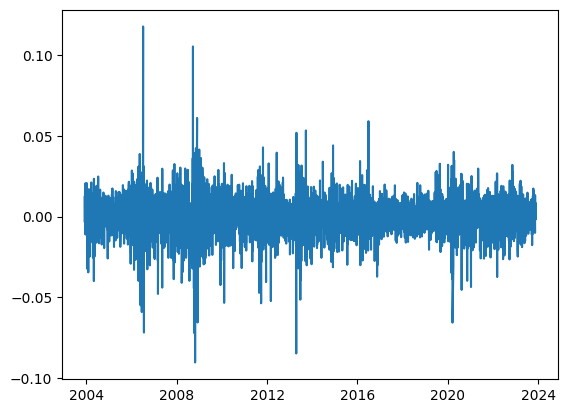

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax= plt.subplots()
ax.plot(data["gold_Open"])
plt.show()

In [47]:
x_select.shape, y_select.shape

((4993, 13), (4993,))

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_select, y_select, test_size = 0.33, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3345, 13) (1648, 13) (3345,) (1648,)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

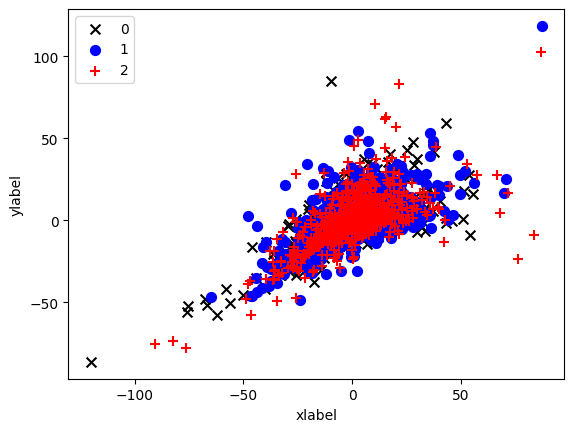

In [ ]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

plt.scatter(x_t0.iloc[:,0], x_t0.iloc[:,1], marker='x', c='k', s=50, label='0')
plt.scatter(x_t1.iloc[:,0], x_t1.iloc[:,1], marker='o', c='b', s=50, label='1')
plt.scatter(x_t2.iloc[:,0], x_t2.iloc[:,1], marker='+', c='r', s=50, label='2')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.legend()
plt.show()

In [38]:
n_input = x_train.shape[1]

n_output = len(list(set(y_train)))

print(f'n_input: {n_input} n_output: {n_output}')

n_input: 13 n_output: 3


In [17]:
!pip install torchinfo
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=ea492f155258cff2fcd0372a63db5713ef1664c162c0edd67c2d43e6d3f82b2c
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

net = Net(n_input, n_output)

In [50]:
for parameter in net.named_parameters():
  print(parameter)

('l1.weight', Parameter containing:
tensor([[ 0.1450,  0.1750,  0.1518,  0.2245,  0.0562, -0.1357, -0.2597, -0.2190,
          0.0056, -0.2572, -0.1882, -0.0829, -0.2600],
        [-0.2296,  0.1375, -0.2402,  0.1924, -0.1264,  0.1596,  0.2417,  0.1173,
         -0.2663, -0.0877, -0.2458,  0.2408, -0.1817],
        [-0.1276, -0.2540,  0.2001, -0.2301,  0.0620,  0.1518, -0.1053,  0.2205,
          0.1214,  0.2025, -0.0698, -0.2026,  0.0375]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([0.2185, 0.1957, 0.1351], requires_grad=True))


In [51]:
criterion = nn.CrossEntropyLoss()

lr = 0.01

optimizer = optim.Adam(net.parameters(), lr=lr)

In [52]:
inputs = torch.tensor(x_train.values).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test.values).float()
labels_test = torch.tensor(y_test).long()

In [53]:
import numpy as np

lr = 0.01

net = Net(n_input, n_output)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=1e-5)

num_epochs = 10000

history = np.zeros((0,5))

In [ ]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):

    # 훈련 페이즈
    net.train()
    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()
    net.eval()
    # 예측 라벨 산출
    predicted = torch.max(outputs, 1)[1]

    # 손실과 정확도 계산
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    # 예측 페이즈
    net.eval()
    # 예측 계산
    outputs_test = net(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels_test)

    # 예측 라벨 산출
    predicted_test = torch.max(outputs_test, 1)[1]

    # 손실과 정확도 계산
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)

    if ((epoch) % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

In [70]:
#net.eval()
#predict=net(torch.tensor(data.iloc[:,:12].values))
#torch.max(predict, 1)[1]
import numpy
import pandas as pd

pd.Series(predicted_test).value_counts()

1    809
0    428
2    411
dtype: int64

In [ ]:
net.

In [ ]:
import yfinance as yf
nasdaq=yf.download("^IXIC", start='2005-06-03')
data=nasdaq
import pandas as pd
data
df = data
df['Rate'] = 0
for i in range(len(df)):
    if i == len(df)-1:
        break
    df['Rate'][i] = ((df['Close'][i+1] - df['Close'][i])/df['Close'][i])*100

[*********************100%%**********************]  1 of 1 completed


<ipython-input-1-9903b34647f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate'][i] = ((df['Close'][i+1] - df['Close'][i])/df['Close'][i])*100


In [ ]:
for i in range(len(df['Rate'])):
    if df['Rate'][i] > 0.7:
        df['Rate'][i] = 2
    elif df['Rate'][i] < -0.5:
        df['Rate'][i] = 0
    else:
        df['Rate'][i] = 1
Rate_data = df

In [ ]:
import yfinance as yf
start_d="2004-08-19"
hist=yf.download("GOOG",start=start_d) #구글
#hist=google.history(start="2005-08-01") #모든기간 데이터 불러오기
#"2004-08-19"
import pandas as pd
hist=hist.reset_index()

#단순 이동평균 (Simple Moving Average)
#지수 이동 평균(Exponetial Moving Average) df.Close.ewm(5)
#>>보다 최근 값에 가중치를 두면서 이동평균 계산 "평활계수"
#가중 이동 평균(Weighted Moving Average)
#>>현재 가까운 가격이 과거 가격보다 더 중요한 전제 를바탕

hist['sma5']=hist.Close.rolling(5).mean() #1주
hist['sma20']=hist.Close.rolling(20).mean() #4주
hist['sma50']=hist.Close.rolling(50).mean() #한 분기
hist['sma100']=hist.Close.rolling(100).mean() #반년
hist['sma200']=hist.Close.rolling(200).mean() #1년

hist.reset_index(drop=True,inplace=True)

hist["Y"]=hist["Close"].shift(-1) #하루 이후의 종가 데이터가 종속변수

[*********************100%%**********************]  1 of 1 completed


In [ ]:
hist[200:]

,Date,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y
200,2005-06-06,2.315833,2.361667,2.314167,2.335833,2.142953,51289200,2.319167,2.172333,2.004183,2.042842,1.740046,2.279167
201,2005-06-07,2.320000,2.358333,2.270833,2.279167,2.090967,97413600,2.323333,2.187958,2.008350,2.047950,1.746296,2.263333
202,2005-06-08,2.285000,2.316667,2.239167,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333
203,2005-06-09,2.245833,2.359167,2.243333,2.358333,2.163596,61990800,2.319000,2.231625,2.019783,2.058375,1.759083,2.331667
204,2005-06-10,2.355833,2.358333,2.315833,2.331667,2.139132,46509600,2.313667,2.253250,2.026817,2.063483,1.765462,2.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,2023-11-16,486.790009,495.250000,483.299988,494.799988,494.799988,33975600,489.958002,446.807999,443.429202,446.783900,368.869000,492.980011
4846,2023-11-17,495.239990,497.170013,490.070007,492.980011,492.980011,32520500,491.884003,450.763499,444.174402,447.602000,370.248450,504.089996
4847,2023-11-20,493.119995,505.480011,491.809998,504.089996,504.089996,41412000,495.462000,454.480499,445.220602,448.560700,371.713900,499.440002
4848,2023-11-21,501.260010,505.170013,492.220001,499.440002,499.440002,56574700,496.038000,457.620999,446.235402,449.324901,373.156650,487.160004


In [ ]:
hist=hist.drop(len(hist)-1)
hist=hist.iloc[200:,:]

In [ ]:
df=df.drop("2023-11-17").drop("2005-06-03")
df.reset_index(drop=False,inplace=True)
hist.reset_index(drop=True,inplace=True)

In [ ]:
len(df),len(hist)

(4649, 4649)

In [ ]:
df_concat=pd.concat([df,hist],axis=1)
df_concat

,Date,Open,High,Low,Close,Adj Close,Volume,Rate,Date,Open,...,Low,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y
0,2005-06-06,2072.360107,2078.610107,2066.360107,2075.760010,2075.760010,1477150000,1.0,2005-06-06,2.315833,...,2.314167,2.335833,2.142953,51289200,2.319167,2.172333,2.004183,2.042842,1.740046,2.279167
1,2005-06-07,2079.060059,2095.959961,2067.139893,2067.159912,2067.159912,1846530000,1.0,2005-06-07,2.320000,...,2.270833,2.279167,2.090967,97413600,2.323333,2.187958,2.008350,2.047950,1.746296,2.263333
2,2005-06-08,2073.209961,2074.610107,2057.580078,2060.179932,2060.179932,1602540000,2.0,2005-06-08,2.285000,...,2.239167,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333
3,2005-06-09,2059.580078,2077.469971,2052.959961,2076.909912,2076.909912,1666670000,0.0,2005-06-09,2.245833,...,2.243333,2.358333,2.163596,61990800,2.319000,2.231625,2.019783,2.058375,1.759083,2.331667
4,2005-06-10,2076.250000,2076.250000,2055.939941,2063.000000,2063.000000,1449380000,1.0,2005-06-10,2.355833,...,2.315833,2.331667,2.139132,46509600,2.313667,2.253250,2.026817,2.063483,1.765462,2.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,2023-11-15,14147.269531,14194.360352,14060.700195,14103.839844,14103.839844,5063830000,1.0,2023-11-15,499.350006,...,482.000000,488.880005,488.880005,47549700,484.898004,443.118500,442.781402,446.023501,367.442150,494.799988
4645,2023-11-16,14066.879883,14130.450195,14033.790039,14113.669922,14113.669922,4545180000,1.0,2023-11-16,486.790009,...,483.299988,494.799988,494.799988,33975600,489.958002,446.807999,443.429202,446.783900,368.869000,492.980011
4646,2023-11-20,14134.750000,14309.799805,14134.200195,14284.530273,14284.530273,4561810000,0.0,2023-11-17,495.239990,...,490.070007,492.980011,492.980011,32520500,491.884003,450.763499,444.174402,447.602000,370.248450,504.089996
4647,2023-11-21,14217.230469,14237.500000,14146.309570,14199.980469,14199.980469,4128600000,1.0,2023-11-20,493.119995,...,491.809998,504.089996,504.089996,41412000,495.462000,454.480499,445.220602,448.560700,371.713900,499.440002


In [ ]:
df_real=df_concat
df_train=df_concat.iloc[:,9:]
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y
0,2.315833,2.361667,2.314167,2.335833,2.142953,51289200,2.319167,2.172333,2.004183,2.042842,1.740046,2.279167
1,2.320000,2.358333,2.270833,2.279167,2.090967,97413600,2.323333,2.187958,2.008350,2.047950,1.746296,2.263333
2,2.285000,2.316667,2.239167,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333
3,2.245833,2.359167,2.243333,2.358333,2.163596,61990800,2.319000,2.231625,2.019783,2.058375,1.759083,2.331667
4,2.355833,2.358333,2.315833,2.331667,2.139132,46509600,2.313667,2.253250,2.026817,2.063483,1.765462,2.383333


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

#model=Deep_lstm(7,128,0.2,1,2)
class Deep_lstm(nn.Module):
    def __init__(self,input_dim,hidden_dim,dropout_rate,output_dim,num_layer):
        """
        (batch,num_feature, data)
        """
        super(Deep_lstm,self).__init__()
        self.input_dim=input_dim
        self.hidden_dim=hidden_dim
        self.num_layer=num_layer
        self.dropout_rate=dropout_rate
        self.output_dim=output_dim
        self.lstm=nn.LSTM(input_size=self.input_dim,hidden_size=self.hidden_dim,
                         num_layers=self.num_layer,batch_first=False,dropout=self.dropout_rate)
        self.linear=nn.Linear(in_features=self.hidden_dim,out_features=self.output_dim)

    def forward(self,x,hidden=None):
        lstm_out,hidden=self.lstm(x,hidden)
        linear_out=self.linear(lstm_out)
        return linear_out, hidden

In [ ]:
def train(model,train_and_valid_data,epochs):
        train_x, train_y, valid_x, valid_y= train_and_valid_data
        train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()
        train_loader=DataLoader(TensorDataset(train_x,train_y),batch_size=32)

        valid_x, valid_y = torch.from_numpy(valid_x).float(),torch.from_numpy(valid_y).float()
        valid_loader=DataLoader(TensorDataset(valid_x,valid_y),batch_size=32)

        device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model=model.to(device)
        optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
        criterion=torch.nn.MSELoss()
        valid_loss_min=float("inf")
        bad_epoch=0
        global_step=0
        for epoch in range(epochs):
            train_loss_array=[]
            hidden_train=None
            model.train()
            for i, _data in enumerate(train_loader):
                _train_x,_train_y=_data[0].to(device),_data[1].to(device)
                optimizer.zero_grad()
                pred,hidden_train=model(_train_x,hidden_train)
                h_0, c_0 = hidden_train
                h_0.detach_(),c_0.detach_()
                hidden_Train=(h_0,c_0)
            loss=criterion(pred,_train_y)
            loss.backward()
            optimizer.step()
            train_loss_array.append(loss.item())
            global_step+=1
            if global_step%100==0:
                print("epoch: %d loss: %f" %(epoch, loss.item()))

            model.eval()
            valid_loss_array=[]
            hidden_valid=None
            for _valid_x,_valid_y in valid_loader:
                _valid_x,_valid_y=_valid_x.to(device),_valid_y.to(device)
                pred,hidden_valid=model(_valid_x,hidden_valid)
                loss=criterion(pred,_valid_y)
                valid_loss_array.append(loss.item())

            train_loss_cur=np.mean(train_loss_array)
            valid_loss_cur=np.mean(valid_loss_array)
            print("train loss: %f valid loss: %f" % (train_loss_cur,valid_loss_cur))
            if valid_loss_cur<valid_loss_min:
                valid_loss_min=valid_loss_cur
                bad_epoch=0
            else:
                bad_epoch+=1

def predict(x,model):
    test_x=torch.from_numpy(x).float()
    test_set=TensorDataset(test_x)
    test_loader=DataLoader(test_set,batch_size=1)

    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    result=torch.Tensor().to(device)
    model.eval()
    hidden_predict=None
    for _data in test_loader:
        data_x=_data[0].to(device)
        pred,hidden_predict=model(data_x,hidden_predict)
        cur_pred=torch.squeeze(pred,dim=0)
        result=torch.cat((result,cur_pred),dim=0)

    return result.detach().cpu().numpy()

In [ ]:
import numpy as np
train_data_rate=0.8
valid_data_rate=0.15

data_x=df_train[["Open","Close","High","Low","Volume","sma5","sma20","sma50","sma100","sma200"]]
data_y=df_train[["Y"]]
data_columns=[*data_x.columns]
data_x=np.asarray(data_x)
data_y=np.asarray(data_y)
data_num=data_x.shape[0] #row
train_num=int(data_num*train_data_rate)

data_mean=np.mean(data_x,axis=0)
data_std=np.std(data_x,axis=0)
norm_data_x=(data_x.data-data_mean)/data_std
norm_data_y=(data_y-data_y.mean())/data_y.std()

predict_day=1
time_step=50
epoch=20
train_set_x=norm_data_x[:train_num]
test_set_x=norm_data_x[train_num:]
train_set_y=norm_data_y[:train_num]
test_set_y=norm_data_y[train_num:]

In [ ]:
df_train

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y
0,2.315833,2.361667,2.314167,2.335833,2.142953,51289200,2.319167,2.172333,2.004183,2.042842,1.740046,2.279167
1,2.320000,2.358333,2.270833,2.279167,2.090967,97413600,2.323333,2.187958,2.008350,2.047950,1.746296,2.263333
2,2.285000,2.316667,2.239167,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333
3,2.245833,2.359167,2.243333,2.358333,2.163596,61990800,2.319000,2.231625,2.019783,2.058375,1.759083,2.331667
4,2.355833,2.358333,2.315833,2.331667,2.139132,46509600,2.313667,2.253250,2.026817,2.063483,1.765462,2.383333
...,...,...,...,...,...,...,...,...,...,...,...,...
4644,499.350006,499.600006,482.000000,488.880005,488.880005,47549700,484.898004,443.118500,442.781402,446.023501,367.442150,494.799988
4645,486.790009,495.250000,483.299988,494.799988,494.799988,33975600,489.958002,446.807999,443.429202,446.783900,368.869000,492.980011
4646,495.239990,497.170013,490.070007,492.980011,492.980011,32520500,491.884003,450.763499,444.174402,447.602000,370.248450,504.089996
4647,493.119995,505.480011,491.809998,504.089996,504.089996,41412000,495.462000,454.480499,445.220602,448.560700,371.713900,499.440002


In [ ]:
from sklearn.model_selection import train_test_split
feature_data=train_set_x
label_data=train_set_y
train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step)
            for i in range((train_num - start_index) // time_step)]
train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step)
            for i in range((train_num - start_index) // time_step)]
train_x, train_y = np.array(train_x), np.array(train_y)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                              random_state=1234,
                                                              shuffle=True)
train_and_valid_data=(train_x,train_y,valid_x,valid_y)

In [ ]:
train_x

In [ ]:
model=Deep_lstm(10,32,0.5,1,1)
epochs=1000
train(model,train_and_valid_data,epochs)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


train loss: 0.100554 valid loss: 0.171574
train loss: 0.095170 valid loss: 0.159791
train loss: 0.090090 valid loss: 0.148487
train loss: 0.085305 valid loss: 0.137621
train loss: 0.080804 valid loss: 0.127172
train loss: 0.076587 valid loss: 0.117134
train loss: 0.072656 valid loss: 0.107508
train loss: 0.069017 valid loss: 0.098300
train loss: 0.065680 valid loss: 0.089526
train loss: 0.062654 valid loss: 0.081211
train loss: 0.059955 valid loss: 0.073387
train loss: 0.057599 valid loss: 0.066100
train loss: 0.055600 valid loss: 0.059402
train loss: 0.053976 valid loss: 0.053352
train loss: 0.052734 valid loss: 0.048009
train loss: 0.051875 valid loss: 0.043425
train loss: 0.051380 valid loss: 0.039631
train loss: 0.051201 valid loss: 0.036621
train loss: 0.051258 valid loss: 0.034334
train loss: 0.051435 valid loss: 0.032653
train loss: 0.051603 valid loss: 0.031436
train loss: 0.051649 valid loss: 0.030544
train loss: 0.051495 valid loss: 0.029867
train loss: 0.051110 valid loss: 0

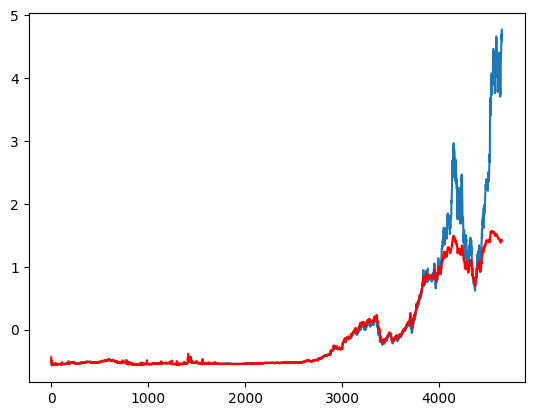

In [ ]:
# @title 모델결과

import matplotlib.pyplot as plt

predict_x=norm_data_x

result=predict(predict_x,model)
fig,ax=plt.subplots()
ax.plot(norm_data_y)
ax.plot(result, color='r')
plt.show()

In [ ]:
criterion=torch.nn.MSELoss()
test_pred=predict(test_set_x,model)
np.sum((test_pred-test_set_y)**2)/len(test_set_y)

1702.5154467917837

In [ ]:
model_result=pd.Series(result)
final_df=pd.concat([df_concat,model_result],axis=1)

In [ ]:
final_df

,Date,Open,High,Low,Close,Adj Close,Volume,Rate,Date,Open,...,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y,0
0,2005-06-06,2072.360107,2078.610107,2066.360107,2075.760010,2075.760010,1477150000,1.0,2005-06-06,2.315833,...,2.335833,2.142953,51289200,2.319167,2.172333,2.004183,2.042842,1.740046,2.279167,-0.437324
1,2005-06-07,2079.060059,2095.959961,2067.139893,2067.159912,2067.159912,1846530000,1.0,2005-06-07,2.320000,...,2.279167,2.090967,97413600,2.323333,2.187958,2.008350,2.047950,1.746296,2.263333,-0.497028
2,2005-06-08,2073.209961,2074.610107,2057.580078,2060.179932,2060.179932,1602540000,2.0,2005-06-08,2.285000,...,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333,-0.513492
3,2005-06-09,2059.580078,2077.469971,2052.959961,2076.909912,2076.909912,1666670000,0.0,2005-06-09,2.245833,...,2.358333,2.163596,61990800,2.319000,2.231625,2.019783,2.058375,1.759083,2.331667,-0.511690
4,2005-06-10,2076.250000,2076.250000,2055.939941,2063.000000,2063.000000,1449380000,1.0,2005-06-10,2.355833,...,2.331667,2.139132,46509600,2.313667,2.253250,2.026817,2.063483,1.765462,2.383333,-0.520457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,2023-11-15,14147.269531,14194.360352,14060.700195,14103.839844,14103.839844,5063830000,1.0,2023-11-15,499.350006,...,488.880005,488.880005,47549700,484.898004,443.118500,442.781402,446.023501,367.442150,494.799988,1.423545
4645,2023-11-16,14066.879883,14130.450195,14033.790039,14113.669922,14113.669922,4545180000,1.0,2023-11-16,486.790009,...,494.799988,494.799988,33975600,489.958002,446.807999,443.429202,446.783900,368.869000,492.980011,1.428502
4646,2023-11-20,14134.750000,14309.799805,14134.200195,14284.530273,14284.530273,4561810000,0.0,2023-11-17,495.239990,...,492.980011,492.980011,32520500,491.884003,450.763499,444.174402,447.602000,370.248450,504.089996,1.429720
4647,2023-11-21,14217.230469,14237.500000,14146.309570,14199.980469,14199.980469,4128600000,1.0,2023-11-20,493.119995,...,504.089996,504.089996,41412000,495.462000,454.480499,445.220602,448.560700,371.713900,499.440002,1.428690


In [ ]:
final_df=final_df.iloc[:,7:]

In [ ]:
final_df["0_d"]=final_df[0].diff(1)
final_df

,Rate,Date,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y,0,0_d
0,1.0,2005-06-06,2.315833,2.361667,2.314167,2.335833,2.142953,51289200,2.319167,2.172333,2.004183,2.042842,1.740046,2.279167,-0.437324,NaN
1,1.0,2005-06-07,2.320000,2.358333,2.270833,2.279167,2.090967,97413600,2.323333,2.187958,2.008350,2.047950,1.746296,2.263333,-0.497028,-0.059704
2,2.0,2005-06-08,2.285000,2.316667,2.239167,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333,-0.513492,-0.016464
3,0.0,2005-06-09,2.245833,2.359167,2.243333,2.358333,2.163596,61990800,2.319000,2.231625,2.019783,2.058375,1.759083,2.331667,-0.511690,0.001802
4,1.0,2005-06-10,2.355833,2.358333,2.315833,2.331667,2.139132,46509600,2.313667,2.253250,2.026817,2.063483,1.765462,2.383333,-0.520457,-0.008767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,1.0,2023-11-15,499.350006,499.600006,482.000000,488.880005,488.880005,47549700,484.898004,443.118500,442.781402,446.023501,367.442150,494.799988,1.423545,-0.000692
4645,1.0,2023-11-16,486.790009,495.250000,483.299988,494.799988,494.799988,33975600,489.958002,446.807999,443.429202,446.783900,368.869000,492.980011,1.428502,0.004957
4646,0.0,2023-11-17,495.239990,497.170013,490.070007,492.980011,492.980011,32520500,491.884003,450.763499,444.174402,447.602000,370.248450,504.089996,1.429720,0.001218
4647,1.0,2023-11-20,493.119995,505.480011,491.809998,504.089996,504.089996,41412000,495.462000,454.480499,445.220602,448.560700,371.713900,499.440002,1.428690,-0.001029


In [ ]:
final_df["Y_d"]=final_df["Y"].diff(1)


In [ ]:
final_df_real=final_df.set_index(final_df.iloc[:,1])

In [ ]:
final_df_real

,Rate,Date,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y,0,0_d,Y_d
Date,,,,,,,,,,,,,,,,,
2005-06-06,1.0,2005-06-06,2.315833,2.361667,2.314167,2.335833,2.142953,51289200,2.319167,2.172333,2.004183,2.042842,1.740046,2.279167,-0.437324,NaN,NaN
2005-06-07,1.0,2005-06-07,2.320000,2.358333,2.270833,2.279167,2.090967,97413600,2.323333,2.187958,2.008350,2.047950,1.746296,2.263333,-0.497028,-0.059704,-0.015834
2005-06-08,2.0,2005-06-08,2.285000,2.316667,2.239167,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333,-0.513492,-0.016464,0.095000
2005-06-09,0.0,2005-06-09,2.245833,2.359167,2.243333,2.358333,2.163596,61990800,2.319000,2.231625,2.019783,2.058375,1.759083,2.331667,-0.511690,0.001802,-0.026666
2005-06-10,1.0,2005-06-10,2.355833,2.358333,2.315833,2.331667,2.139132,46509600,2.313667,2.253250,2.026817,2.063483,1.765462,2.383333,-0.520457,-0.008767,0.051666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-15,1.0,2023-11-15,499.350006,499.600006,482.000000,488.880005,488.880005,47549700,484.898004,443.118500,442.781402,446.023501,367.442150,494.799988,1.423545,-0.000692,5.919983
2023-11-16,1.0,2023-11-16,486.790009,495.250000,483.299988,494.799988,494.799988,33975600,489.958002,446.807999,443.429202,446.783900,368.869000,492.980011,1.428502,0.004957,-1.819977
2023-11-17,0.0,2023-11-17,495.239990,497.170013,490.070007,492.980011,492.980011,32520500,491.884003,450.763499,444.174402,447.602000,370.248450,504.089996,1.429720,0.001218,11.109985


In [ ]:
#!pip install backtesting
from backtesting import Backtest,Strategy
from backtesting.lib import crossover

class backtesting(Strategy):
  def init(self):
    super().init()
    Open_price=self.data.Open
    Close_price=self.data.Close
  def next(self):
    for i in range(len(self.data)):
      try:
        if self.data["0_d"][i]>=0.0 or self.data["Rate"][i]==2.0:
            self.buy()
        else:
            self.sell()
      except:
        pass

In [ ]:
#!pip install backtesting
from backtesting import Backtest,Strategy
from backtesting.lib import crossover

class backtesting(Strategy):
  def init(self):
    super().init()
    Open_price=self.data.Open
    Close_price=self.data.Close
  def next(self):
    for i in range(len(self.data)):
      try:
        if self.data["0_d"][i]>=0.0 and self.data["Rate"][i]==2.0:
            self.buy()
        elif self.data["Rate"][i]==0.0 or self.data["0_d"][i]<0:
            self.sell()
      except:
        pass

In [ ]:
a=final_df_real
a.reset_index(drop=True,inplace=True)
acc=0
for i,j in enumerate(a[a["Rate"]==2.0]["Y_d"]):
  if j>0 and a["0_d"][i]>0:
    acc+=1
  elif j<0 and a["0_d"][i]<0:
    acc+=1

print(acc/(len(a)-1)*100)

24.182444061962137


In [ ]:
b=final_df_real[final_df_real["Rate"]==1.0]
b.reset_index(drop=True,inplace=True)
acc=0
for i,j in enumerate(b["Y_d"]):
    if j>=0 and b["0_d"][i]>=0:
        acc+=1
    elif j<0 and b["0_d"][i]<0:
        acc+=1

print(acc/len(b)*100)

50.906678460858025


In [ ]:
final_df_real[final_df_real["Rate"]==2.0]

,Rate,Date,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y,0,0_d,Y_d
Date,,,,,,,,,,,,,,,,,
2005-06-08,2.0,2005-06-08,2.285000,2.316667,2.239167,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333,-0.513492,-0.016464,0.095000
2005-06-27,2.0,2005-06-27,2.243333,2.261667,2.219167,2.239167,2.054271,35458800,2.284500,2.293958,2.107050,2.110967,1.831604,2.253333,-0.552500,-0.002322,0.014166
2005-07-01,2.0,2005-07-01,2.219167,2.240000,2.191667,2.236667,2.051976,31516800,2.237667,2.278417,2.141267,2.115967,1.852829,2.271667,-0.550644,0.003065,0.035000
2005-07-07,2.0,2005-07-07,2.295833,2.333333,2.288333,2.315833,2.124605,46590000,2.276667,2.280500,2.167467,2.121508,1.868921,2.345000,-0.550057,0.002488,0.029167
2005-07-08,2.0,2005-07-08,2.330000,2.352500,2.300000,2.345000,2.151363,40813200,2.300333,2.279833,2.178317,2.123625,1.874662,2.380000,-0.551188,-0.001131,0.035000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,2.0,2023-11-01,408.839996,423.809998,408.690002,423.250000,423.250000,43759300,410.183997,434.979501,444.664002,441.256001,353.411550,435.059998,1.390181,0.002553,11.809998
2023-11-02,2.0,2023-11-02,433.279999,438.839996,428.940002,435.059998,435.059998,40917200,416.543994,434.388501,443.942002,441.658401,354.718000,450.049988,1.396135,0.005954,14.989990
2023-11-06,2.0,2023-11-06,452.850006,459.350006,448.989990,457.510010,457.510010,40073300,434.733997,434.249001,443.457002,442.332101,357.525600,459.549988,1.406329,0.005547,2.039978


In [ ]:
final_df_real

,Rate,Date,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma50,sma100,sma200,Y,0,0_d,Y_d
0,1.0,2005-06-06,2.315833,2.361667,2.314167,2.335833,2.142953,51289200,2.319167,2.172333,2.004183,2.042842,1.740046,2.279167,-0.437324,NaN,NaN
1,1.0,2005-06-07,2.320000,2.358333,2.270833,2.279167,2.090967,97413600,2.323333,2.187958,2.008350,2.047950,1.746296,2.263333,-0.497028,-0.059704,-0.015834
2,2.0,2005-06-08,2.285000,2.316667,2.239167,2.263333,2.076440,61872000,2.320167,2.206625,2.013117,2.052717,1.752354,2.358333,-0.513492,-0.016464,0.095000
3,0.0,2005-06-09,2.245833,2.359167,2.243333,2.358333,2.163596,61990800,2.319000,2.231625,2.019783,2.058375,1.759083,2.331667,-0.511690,0.001802,-0.026666
4,1.0,2005-06-10,2.355833,2.358333,2.315833,2.331667,2.139132,46509600,2.313667,2.253250,2.026817,2.063483,1.765462,2.383333,-0.520457,-0.008767,0.051666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,1.0,2023-11-15,499.350006,499.600006,482.000000,488.880005,488.880005,47549700,484.898004,443.118500,442.781402,446.023501,367.442150,494.799988,1.423545,-0.000692,5.919983
4645,1.0,2023-11-16,486.790009,495.250000,483.299988,494.799988,494.799988,33975600,489.958002,446.807999,443.429202,446.783900,368.869000,492.980011,1.428502,0.004957,-1.819977
4646,0.0,2023-11-17,495.239990,497.170013,490.070007,492.980011,492.980011,32520500,491.884003,450.763499,444.174402,447.602000,370.248450,504.089996,1.429720,0.001218,11.109985
4647,1.0,2023-11-20,493.119995,505.480011,491.809998,504.089996,504.089996,41412000,495.462000,454.480499,445.220602,448.560700,371.713900,499.440002,1.428690,-0.001029,-4.649994


In [ ]:
bt=Backtest(final_df_real["2020-01-01":],backtesting,commission=.0002,cash=100000,exclusive_orders=True)
stats=bt.run()
print(stats)

Start                     2020-01-02 00:00:00
End                       2023-11-21 00:00:00
Duration                   1419 days 00:00:00
Exposure Time [%]                   99.795918
Equity Final [$]               3837860.936709
Equity Peak [$]                4634590.093881
Return [%]                        3737.860937
Buy & Hold Return [%]              732.712258
Return (Ann.) [%]                  155.468426
Volatility (Ann.) [%]              145.036116
Sharpe Ratio                         1.071929
Sortino Ratio                        4.465353
Calmar Ratio                          3.91211
Max. Drawdown [%]                  -39.740301
Avg. Drawdown [%]                   -7.360903
Max. Drawdown Duration      210 days 00:00:00
Avg. Drawdown Duration       19 days 00:00:00
# Trades                                  978
Win Rate [%]                        55.521472
Best Trade [%]                      11.725866
Worst Trade [%]                    -27.542888
Avg. Trade [%]                    

In [ ]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1607', ...)